In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import glob
import dateutil
import datetime
import json

from pycountry import countries
from data_loading import TwitterDataLoader, WhoDataLoader
from series_analysis import decompose

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [10, 6]

In [14]:
%%time
twitter_data_loader = TwitterDataLoader('./data/twitter-followers/', followers_percentage_range=(0.01, 1))
who_data_loader = WhoDataLoader('./data/who/')

CPU times: user 3.53 s, sys: 220 ms, total: 3.75 s
Wall time: 3.75 s


## process data for each country locally

In [15]:
def get_countries_summary_df(
    twitter_data_loader,
    who_data_loader,
    dates_range=('8 mar 2020', '11 apr 2020'),
    smoothing_window_size=5,
    correlation_type='pearson'
):
    results_df = pd.DataFrame(columns=[
        'alpha_2',
        
        'twitter_raw',
        'twitter_smooth',
        
        'who_conf_raw',
        'who_conf_smooth',
        
        'who_deaths_raw',
        'who_deaths_smooth',
        
        'who_rec_raw',
        'who_rec_smooth',
        
        'corr_twt_conf',
        'corr_twt_deaths',
        'corr_twt_rec'
    ])
    
    alpha_codes = [c.alpha_2 for c in countries]
    for code in alpha_codes:
        try:
            record = {'alpha_2': code}
            
            # process twitter data
            twitter_raw = twitter_data_loader.get_data(code, dates_range)
            twitter_smooth = decompose(twitter_raw, smoothing_window_size)['trend']
            
            record['twitter_raw'] = twitter_raw
            record['twitter_smooth'] = twitter_smooth
            
            for who_source in ['conf', 'deaths', 'rec']:
                who_raw = who_data_loader.get_data(code, who_source, dates_range)
                who_smooth = decompose(who_raw, smoothing_window_size)['trend']
                corr = twitter_smooth.corr(who_smooth, method=correlation_type)
                
                record[f'who_{who_source}_raw'] = who_raw
                record[f'who_{who_source}_smooth'] = who_smooth
                record[f'corr_twt_{who_source}'] = corr
            
            results_df = results_df.append(record, ignore_index=True)

        except KeyError:
            pass
        
    results_df = results_df.set_index('alpha_2')
    return results_df

In [16]:

summary_df = get_countries_summary_df(twitter_data_loader, who_data_loader, correlation_type='pearson')
summary_df.head()
#summary_df.to_csv("to_visualize.csv")

,twitter_raw,twitter_smooth,who_conf_raw,who_conf_smooth,who_deaths_raw,who_deaths_smooth,who_rec_raw,who_rec_smooth,corr_twt_conf,corr_twt_deaths,corr_twt_rec
alpha_2,,,,,,,,,,,
AF,2020-03-08 36 2020-03-09 16 2020-03-10...,2020-03-10 29.2 2020-03-11 27.8 2020-0...,2020-03-08 3.0 2020-03-09 0.0 2020-03-...,2020-03-10 1.2 2020-03-11 0.6 2020-03-...,2020-03-08 0.0 2020-03-09 0.0 2020-03-10...,2020-03-10 0.0 2020-03-11 0.0 2020-03-12...,2020-03-08 0.0 2020-03-09 0.0 2020-03-...,2020-03-10 0.0 2020-03-11 0.0 2020-03-12...,0.938474,0.808525,0.845378
AO,2020-03-08 91 2020-03-09 80 2020-03-10...,2020-03-10 90.8 2020-03-11 88.6 2020-03-...,2020-03-08 0.0 2020-03-09 0.0 2020-03-10...,2020-03-10 0.0 2020-03-11 0.0 2020-03-12...,2020-03-08 0.0 2020-03-09 0.0 2020-03-10...,2020-03-10 0.0 2020-03-11 0.0 2020-03-12...,2020-03-08 0.0 2020-03-09 0.0 2020-03-10...,2020-03-10 0.0 2020-03-11 0.0 2020-03-12...,0.080878,-0.575275,-0.144580
AL,2020-03-08 59 2020-03-09 35 2020-03-10...,2020-03-10 38.4 2020-03-11 46.0 2020-03-...,2020-03-08 0.0 2020-03-09 2.0 2020-03-...,2020-03-10 4.6 2020-03-11 6.6 2020-03-...,2020-03-08 0.0 2020-03-09 0.0 2020-03-10...,2020-03-10 0.2 2020-03-11 0.2 2020-03-12...,2020-03-08 0.0 2020-03-09 0.0 2020-03-...,2020-03-10 0.0 2020-03-11 0.0 2020-03-...,-0.424310,-0.493332,-0.158113
AD,2020-03-08 59 2020-03-09 91 2020-03-10...,2020-03-10 86.8 2020-03-11 99.6 2020-0...,2020-03-08 0.0 2020-03-09 0.0 2020-03-...,2020-03-10 0.0 2020-03-11 0.0 2020-03-...,2020-03-08 0.0 2020-03-09 0.0 2020-03-10...,2020-03-10 0.0 2020-03-11 0.0 2020-03-12...,2020-03-08 0.0 2020-03-09 0.0 2020-03-...,2020-03-10 0.2 2020-03-11 0.0 2020-03-12...,0.894742,0.659711,0.439174
AE,2020-03-08 121 2020-03-09 253 2020-03-10...,2020-03-10 159.8 2020-03-11 156.0 2020-0...,2020-03-08 0.0 2020-03-09 0.0 2020-0...,2020-03-10 8.0 2020-03-11 8.0 2020-0...,2020-03-08 0.0 2020-03-09 0.0 2020-03-10...,2020-03-10 0.0 2020-03-11 0.0 2020-03-12...,2020-03-08 0.0 2020-03-09 0.0 2020-0...,2020-03-10 2.0 2020-03-11 2.0 2020-03-...,0.043077,0.199216,0.019863


corr_twt_conf       0.285282
corr_twt_deaths     0.114271
corr_twt_rec       0.0618401
Name: US, dtype: object


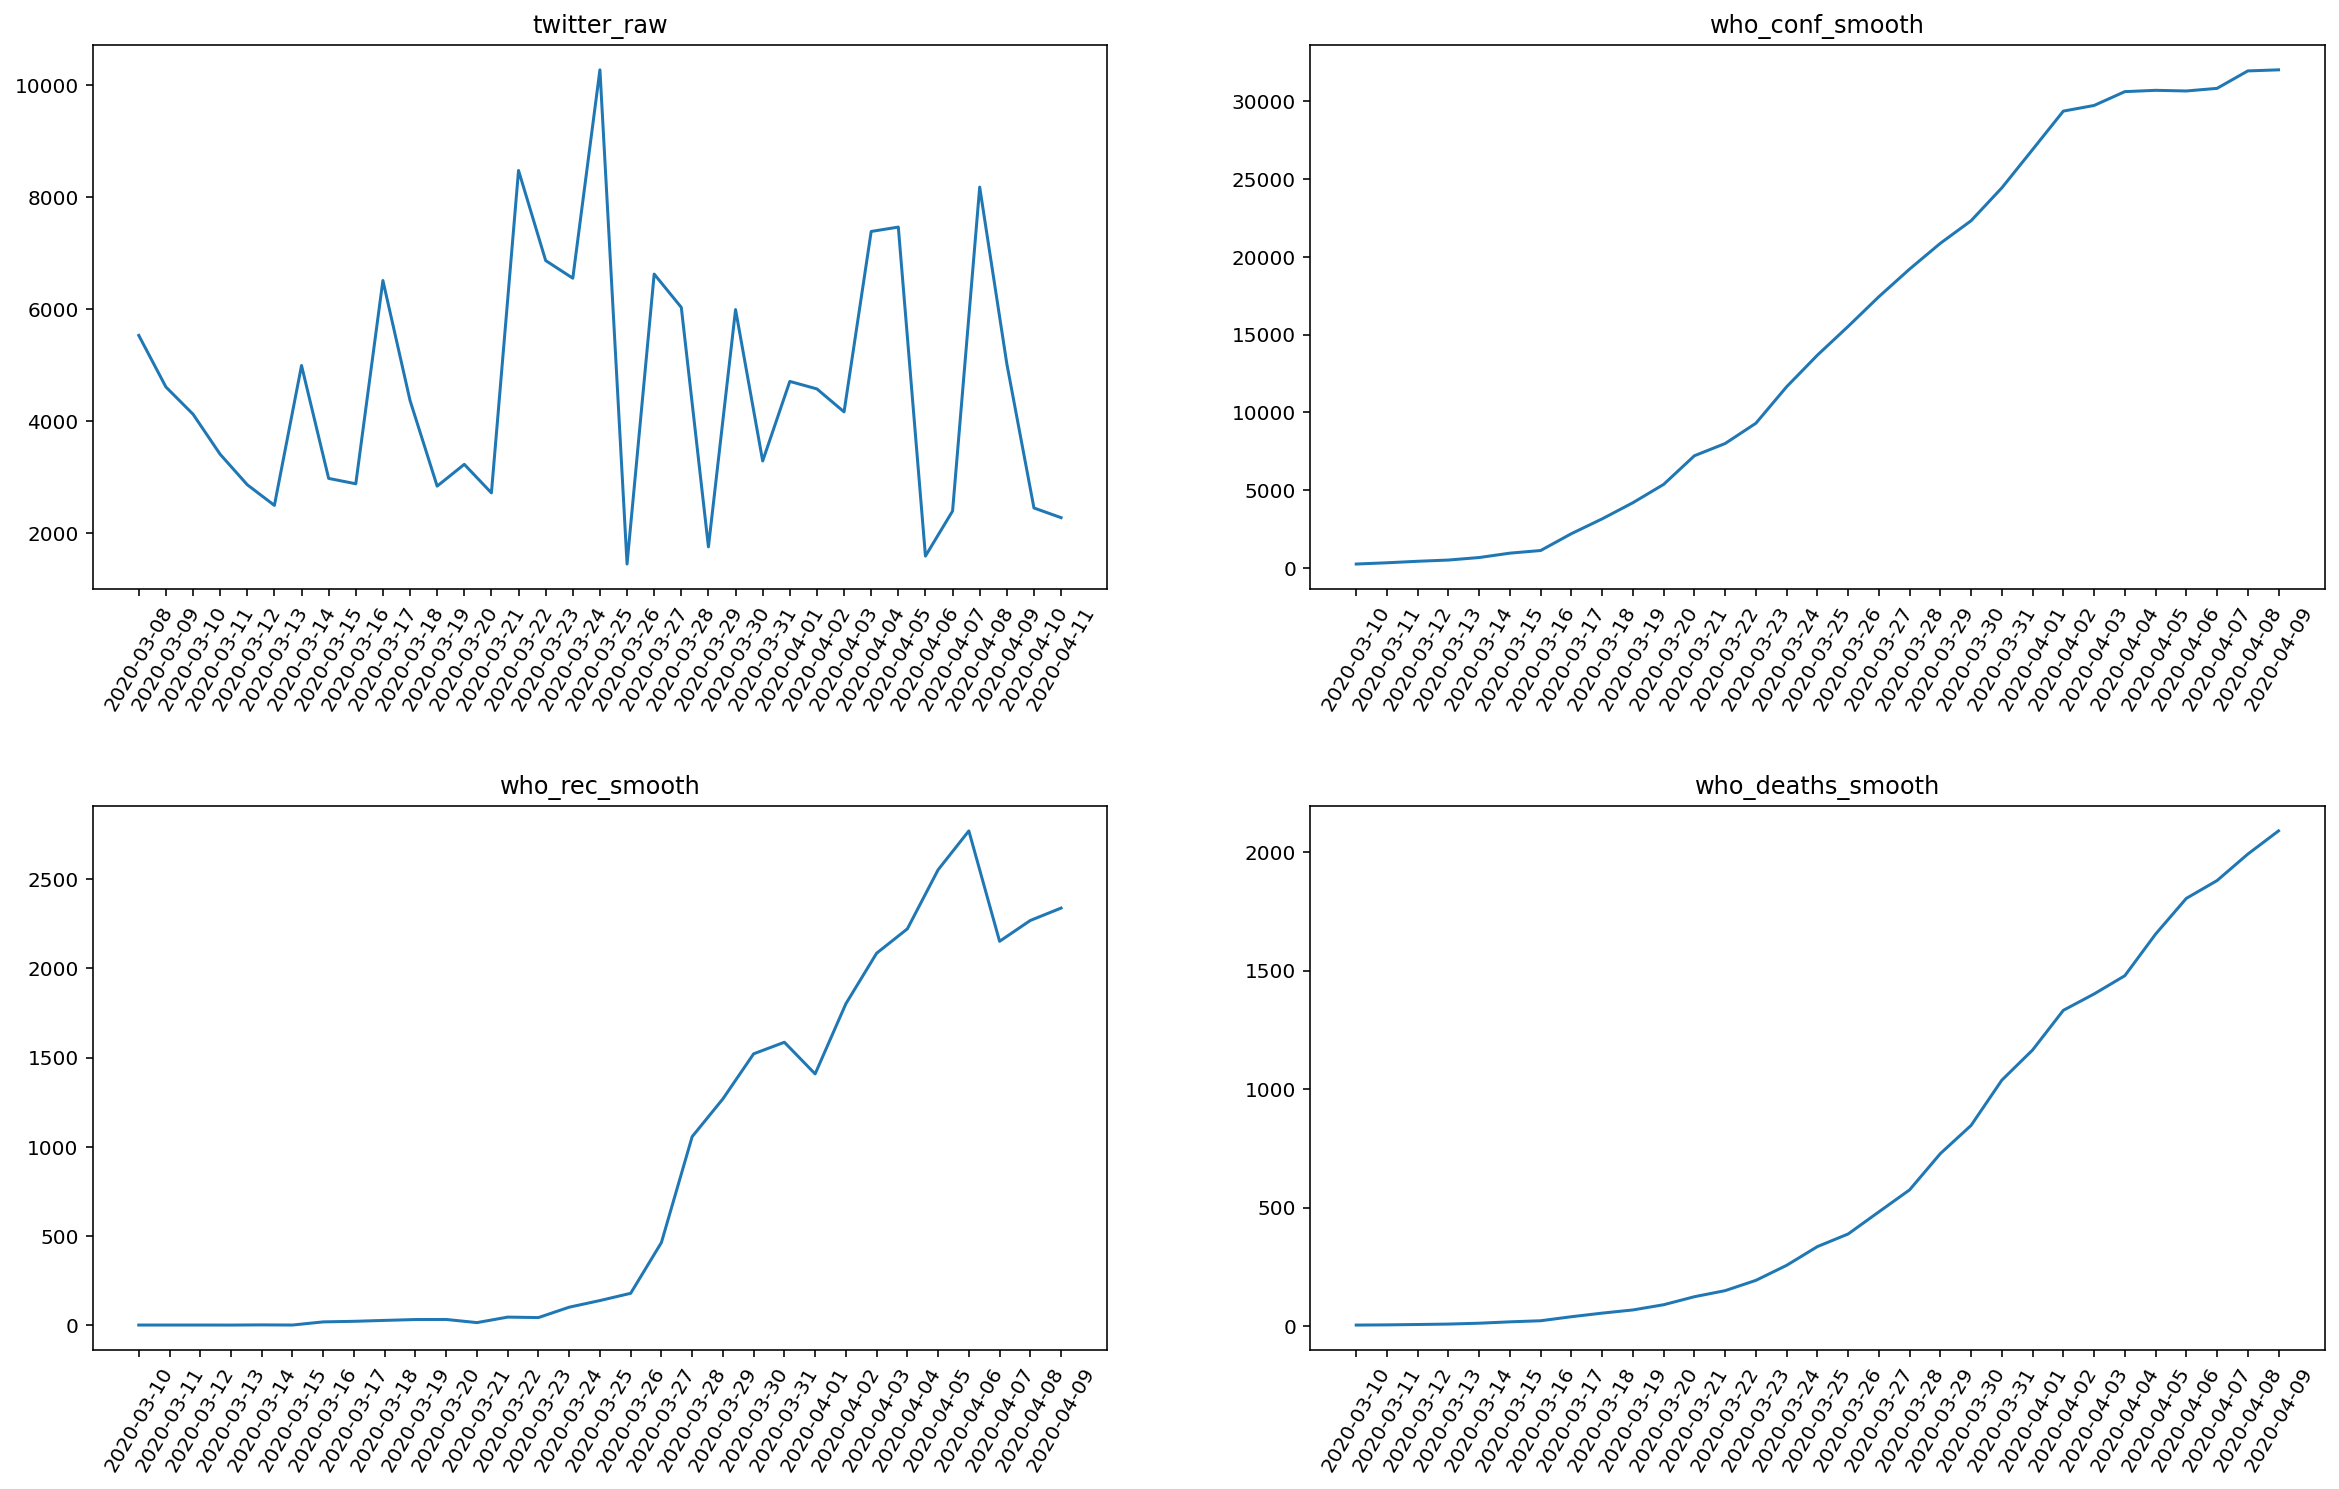

In [17]:
code = 'US'
country_summary = summary_df.loc[code]

series_list = ['twitter_raw', 'who_conf_smooth', 'who_rec_smooth', 'who_deaths_smooth']

print(country_summary[-3:])

plt.figure(figsize=(20, 12))

for i, series_name in enumerate(series_list):
    plt.subplot(2, 2, i + 1)
    plt.xticks(rotation=60)
    plt.plot(country_summary[series_name])
    plt.subplots_adjust(hspace=0.4)
    plt.title(series_name)

## calculate inter-country series correlations

In [6]:
def get_inter_country_correlations(correlation_type='pearson'):
    correlation_dict = {}
    
    for country_code, _ in summary_df['twitter_raw'].iteritems():
        country_dict ={}
        for target_serie in ['twitter_smooth', 'who_conf_smooth', 'who_rec_smooth', 'who_deaths_smooth']:
            series_dict = {}
            for code, series in summary_df[target_serie].iteritems():
                series_dict[code] = series.corr(summary_df[target_serie][country_code], method=correlation_type)

            country_dict[target_serie] = series_dict
        correlation_dict[country_code] = country_dict
        
    return correlation_dict

In [7]:
inter_corrs = get_inter_country_correlations()


In [8]:
with open('correlations.json', 'w') as fp:
    json.dump(inter_corrs, fp)